<!-- # Final Project -->

In [146]:
import numpy as np
import torch
from encoder_decoder import Seq2Seq
from train import run_trial, evaluate
from helper import csv_to_datasets
from data_loader import Dataset, Vocabulary
from analysis import plot_boxplots, plot_filtered_validation_and_test_accuracy
import torch.nn as nn
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter



In [3]:
%load_ext autoreload
%autoreload 2

## DATA LOADING

In [75]:
csv_to_datasets('data/aave.csv')
csv_to_datasets('data/standard.csv')
csv_to_datasets('data/mix.csv')

csv_to_datasets('data/mix.csv', output_dir="general", train_ratio=1, test_ratio=0, dev_ratio=0)
# LEAVE COMMENTED OUT
# csv_to_datasets('data/general.csv')

Train, dev, and test files created in: 'data'
Train, dev, and test files created in: 'data'
Train, dev, and test files created in: 'data'
Train, dev, and test files created in: 'general'


In [76]:
from data_loader import Vocabulary, Dataset

vocab = Vocabulary.from_paired_file('data/dialect.gen')
standard_train = Dataset.from_paired_file('data/standard.train', vocab, sort_by_length=False)
standard_dev = Dataset.from_paired_file('data/standard.dev', vocab)
standard_test = Dataset.from_paired_file('data/standard.test', vocab)

In [77]:
aave_train = Dataset.from_paired_file('data/aave.train', vocab, sort_by_length=False)
aave_dev = Dataset.from_paired_file('data/aave.dev', vocab)
aave_test = Dataset.from_paired_file('data/aave.test', vocab)

In [78]:
mix_train = Dataset.from_paired_file('data/mix.train', vocab, sort_by_length=False)
mix_dev = Dataset.from_paired_file('data/mix.dev', vocab)
mix_test = Dataset.from_paired_file('data/mix.test', vocab)

## TRAINING

In [79]:
repeats = 1

In [92]:
# STANDARD A
embedding_size = 100
hidden_size = 100
attention_size = 50
encoder_output_size = 100
recurrent_type = 'gru'
dropout_prob = .25
bidirectional_encoder = True
use_attention = True
batch_size = 5
lr = .01
num_epochs = 5

model_A = Seq2Seq(len(vocab), embedding_size, hidden_size, encoder_output_size,
                      attention_size, recurrent_type=recurrent_type, 
                      dropout_prob=dropout_prob, bidirectional=bidirectional_encoder, use_attention=use_attention)

for i in range(repeats):
    run_trial(model_A, standard_train, standard_dev, standard_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='standard_A.pt', dataname = 'standard', config = 'A')

    run_trial(model_A, aave_train, aave_dev, aave_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='aave_A.pt', dataname = 'aave', config = 'A')

    run_trial(model_A, mix_train, mix_dev, mix_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='mix_A.pt', dataname = 'mix', config = 'A')


Epoch 1
Training Complete. Loss: 4.64, Accuracy: 0.232
Epoch 1 Validation. Loss: 3.34, Accuracy: 0.317
Saving checkpoint...
Done. Time elapsed: 0.025 seconds
Epoch 2
Training Complete. Loss: 1.79, Accuracy: 0.564
Epoch 2 Validation. Loss: 1.38, Accuracy: 0.639
Saving checkpoint...
Done. Time elapsed: 0.020 seconds
Epoch 3
Training Complete. Loss: 0.64, Accuracy: 0.818
Epoch 3 Validation. Loss: 0.98, Accuracy: 0.739
Saving checkpoint...
Done. Time elapsed: 0.014 seconds
Epoch 4
Training Complete. Loss: 0.33, Accuracy: 0.904
Epoch 4 Validation. Loss: 0.59, Accuracy: 0.856
Saving checkpoint...
Done. Time elapsed: 0.025 seconds
The best validation accuracy of 0.856 occurred after epoch 4.
Test. Loss: 0.65, Accuracy: 0.811
['standard', 'A', 0.31666666666666665, 0.6388888888888888, 0.7388888888888889, 0.8555555555555555, 0.8555555555555555, 0.8112244897959183]
Epoch 1
Training Complete. Loss: 1.11, Accuracy: 0.753
Epoch 1 Validation. Loss: 0.14, Accuracy: 0.959
Saving checkpoint...
Done. Tim

In [81]:
# STANDARD B
embedding_size = 20
hidden_size = 20
attention_size = 20
encoder_output_size = 20
recurrent_type = 'rnn'
dropout_prob = .25
bidirectional_encoder = False
use_attention = True
batch_size = 5
lr = .01
num_epochs = 5

model_B = Seq2Seq(len(vocab), embedding_size, hidden_size, encoder_output_size,
                      attention_size, recurrent_type=recurrent_type, 
                      dropout_prob=dropout_prob, bidirectional=bidirectional_encoder, use_attention=use_attention)


for i in range(repeats):
    run_trial(model_B, standard_train, standard_dev, standard_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='standard_B.pt', dataname = 'standard', config = 'B')

    run_trial(model_B, aave_train, aave_dev, aave_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='aave_B.pt', dataname = 'aave', config = 'B')

    run_trial(model_B, mix_train, mix_dev, mix_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='mix_B.pt', dataname = 'mix', config = 'B')


Epoch 1
Training Complete. Loss: 5.84, Accuracy: 0.056
Epoch 1 Validation. Loss: 5.24, Accuracy: 0.067
Saving checkpoint...
Done. Time elapsed: 0.008 seconds
Epoch 2
Training Complete. Loss: 4.92, Accuracy: 0.163
Epoch 2 Validation. Loss: 4.51, Accuracy: 0.217
Saving checkpoint...
Done. Time elapsed: 0.008 seconds
Epoch 3
Training Complete. Loss: 4.25, Accuracy: 0.249
Epoch 3 Validation. Loss: 3.95, Accuracy: 0.244
Saving checkpoint...
Done. Time elapsed: 0.005 seconds
Epoch 4
Training Complete. Loss: 3.76, Accuracy: 0.281
Epoch 4 Validation. Loss: 3.53, Accuracy: 0.289
Saving checkpoint...
Done. Time elapsed: 0.004 seconds
The best validation accuracy of 0.289 occurred after epoch 4.
Test. Loss: 3.53, Accuracy: 0.224
['standard', 'B', 0.06666666666666667, 0.21666666666666667, 0.24444444444444444, 0.28888888888888886, 0.28888888888888886, 0.22448979591836735]
Epoch 1
Training Complete. Loss: 3.70, Accuracy: 0.287
Epoch 1 Validation. Loss: 3.35, Accuracy: 0.280
Saving checkpoint...
Done

In [82]:
# STANDARD C
embedding_size = 75
hidden_size = 75
attention_size = 70
encoder_output_size = 75
recurrent_type = 'rnn'
dropout_prob = .25
bidirectional_encoder = False
use_attention = True
batch_size = 5
lr = .01
num_epochs = 5

model_C = Seq2Seq(len(vocab), embedding_size, hidden_size, encoder_output_size,
                      attention_size, recurrent_type=recurrent_type, 
                      dropout_prob=dropout_prob, bidirectional=bidirectional_encoder, use_attention=use_attention)

for i in range(repeats):
    run_trial(model_C, standard_train, standard_dev, standard_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='standard_C.pt', dataname = 'standard', config = 'C')

    run_trial(model_C, aave_train, aave_dev, aave_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='aave_C.pt', dataname = 'aave', config = 'C')

    run_trial(model_C, mix_train, mix_dev, mix_test, vocab=vocab, num_epochs=4, 
            batch_size = batch_size, report_frequency=1000, filename='mix_C.pt', dataname = 'mix', config = 'C')


Epoch 1
Training Complete. Loss: 5.18, Accuracy: 0.214
Epoch 1 Validation. Loss: 3.63, Accuracy: 0.283
Saving checkpoint...
Done. Time elapsed: 0.038 seconds
Epoch 2
Training Complete. Loss: 2.56, Accuracy: 0.448
Epoch 2 Validation. Loss: 1.76, Accuracy: 0.544
Saving checkpoint...
Done. Time elapsed: 0.008 seconds
Epoch 3
Training Complete. Loss: 1.29, Accuracy: 0.679
Epoch 3 Validation. Loss: 1.11, Accuracy: 0.694
Saving checkpoint...
Done. Time elapsed: 0.019 seconds
Epoch 4
Training Complete. Loss: 0.91, Accuracy: 0.758
Epoch 4 Validation. Loss: 0.92, Accuracy: 0.761
Saving checkpoint...
Done. Time elapsed: 0.007 seconds
The best validation accuracy of 0.761 occurred after epoch 4.
Test. Loss: 0.72, Accuracy: 0.842
['standard', 'C', 0.2833333333333333, 0.5444444444444444, 0.6944444444444444, 0.7611111111111111, 0.7611111111111111, 0.8418367346938775]
Epoch 1
Training Complete. Loss: 1.36, Accuracy: 0.698
Epoch 1 Validation. Loss: 0.37, Accuracy: 0.881
Saving checkpoint...
Done. Time

<!-- #### Problem 21. 
 
How many epochs of training were needed to achieve the best validation accuracy? How well does your model perform on the test set?  In order to explore how the model is accomplishing the task of verb reinflection, you can try to use the heat maps of the attention mechanism.  A convenient way to do this is with the `test_tense_example` function in `analysis.py`. Given an input sentence and its target output, this function will print out the model's predicted output, along with a heat map of the attention weights.   -->

<!-- What patterns do you see in the attention weights? What can you tell from the attention weights about how the model is accomplishing the task of tense reinflection?  -->

<!-- As impressive as this performance is, the data that the model has been trained and evaluated on is limited in a significant respect. In sentences involving subjects modified by a prepositional phrase or relative clause, all of the nouns between the verb and the subject noun are identical in number. This means that while the model could succeed, as we would, by identifying the grammatical subject and using its grammatical number, it can also succeed simply by attending to the number of the closest noun. We will call the first of these strategies a *hierarchical* rule for agreement, since it depends on understanding something about the syntactic structure of the sentence. The second we will call a *linear* rule, since it depends on the linearly closest noun.  Our goal is to find out which of these two rules the seq2seq model is using.

To proceed, you should download a generalization data set from the following link:

* [generalization set](https://github.com/tommccoy1/rnn-hierarchical-biases/blob/master/data/tense.gen)

This dataset is similar to the test set on which the model was already evaluated at the conclusion of training, but includes sentences in which the verb is separated from the subject noun by a noun that differs in number.  You can load this dataset using the `from_paired_file` method in the `Dataset` class, as before. -->

## Evaluating Performance of Standard, AAVE, Mix Model on General Dataset

<!-- #### Problem 22.

Evaluate your model on the generalization set using the `evaluate` function: -->

In [252]:
from train import evaluate


model_C.load_state_dict(torch.load('standard_C.pt'))

# STANDARD MODEL B EVALUATION
_ = evaluate(model_C, mix_test, 
              nn.CrossEntropyLoss(ignore_index=vocab.get_index('[PAD]')),
             message = "Standard Model C Evaluated on Mix Test Set")

model_C.load_state_dict(torch.load('aave_C.pt'))

_ = evaluate(model_C, mix_test, 
             nn.CrossEntropyLoss(ignore_index=vocab.get_index('[PAD]')),
             message = "AAVE Model C Evaluated on Mix Test Set")

model_C.load_state_dict(torch.load('mix_C.pt'))

_ = evaluate(model_C, mix_test, 
             nn.CrossEntropyLoss(ignore_index=vocab.get_index('[PAD]')),
             message = "Mix Model C Evaluated on Mix Test Set")


Standard Model C Evaluated on Mix Test Set. Loss: 0.08, Accuracy: 0.751
AAVE Model C Evaluated on Mix Test Set. Loss: 0.02, Accuracy: 0.876
Mix Model C Evaluated on Mix Test Set. Loss: 0.00, Accuracy: 0.972


## Creating Figures

<!-- The accuracy number given here represents the proportion of tokens in the output that are correct. This model does not however tell us whether the model is using a hierarchical or linear rule, since it does not focus on the accuracy of subject-verb agreement in particular. To determine this, we will need to look at accuracy of the prediction of verbs specifically. I have provided a function `test_verbs` in `analysis.py` that will compute the number of verbs that are correctly predicted and the number of sentences that are predicted entirely correctly. -->

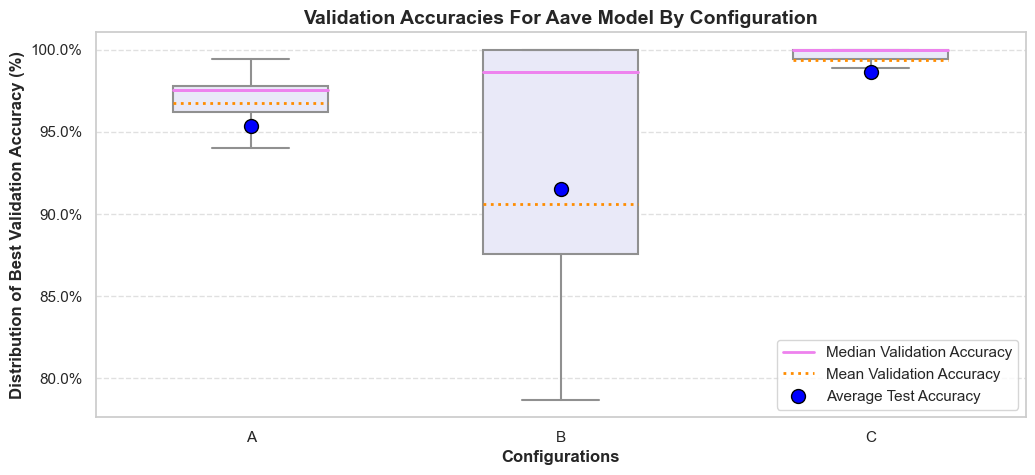

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines  # For creating custom legend handles
from matplotlib.ticker import PercentFormatter


def create_boxplots(csv_file, filter_value, first_col, second_col):
    """
    Create box plots and overlay average accuracy values.

    Parameters:
    - csv_file: Path to the CSV file.
    - filter_value: Value to filter rows based on the first column.
    - first_col: Name of the first column (used for filtering).
    - second_col: Name of the second column (categorical column A, B, C).
    """
    # Load the data
    df = pd.read_csv(csv_file)

    # Filter rows where the first column equals the filter_value
    filtered_df = df[df[first_col] == filter_value]

    # Extract relevant columns
    second_last_col = df.columns[-2]  # Second-to-last column
    last_col = df.columns[-1]         # Last column
    
    # Calculate the average of the last column per category in the second column
    avg_accuracy = filtered_df.groupby(second_col)[last_col].mean()

    # Calculate group statistics for median and mean
    group_stats = filtered_df.groupby(second_col).agg({second_last_col: ['median', 'mean']})
    
    # Initialize the plot
    plt.figure(figsize=(12, 5))

    # Create the boxplot for the second-to-last column grouped by second column categories
    sns.boxplot(x=second_col, y=second_last_col, data=filtered_df, 
                color='lavender', showfliers=False, width = 0.5, linewidth=1.5, order=['A', 'B', 'C'],
                medianprops={'color': 'violet', 'linewidth': 2})

    # Overlay group-specific median and mean lines
    for i, (median, mean) in enumerate(zip(group_stats[second_last_col]['median'], group_stats[second_last_col]['mean'])):
        plt.hlines(y=median, xmin=i-0.25, xmax=i+0.25, colors='violet', linestyles='solid', linewidth=2)
        plt.hlines(y=mean, xmin=i-0.25, xmax=i+0.25, colors='darkorange', linestyles='dotted', linewidth=2)

    # Overlay the average test accuracy points
    scatter = plt.scatter(
        x=range(len(avg_accuracy)),
        y=avg_accuracy,
        color='blue',
        s=100, edgecolor='black', zorder=5, label='Average Test Accuracy'
    )

    # Add proxy artists for median and mean to appear in the legend
    median_line = mlines.Line2D([], [], color='violet', linestyle='solid', linewidth=2, label='Median Validation Accuracy')
    mean_line = mlines.Line2D([], [], color='darkorange', linestyle='dotted', linewidth=2, label='Mean Validation Accuracy')

    # Add legend with custom handles
    plt.legend(handles=[median_line, mean_line, scatter], loc='lower right', frameon=True)

    # Format the Y-axis as percentages
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

    # Add labels and title
    plt.xlabel("Configurations", fontsize=12, fontweight='bold')
    plt.ylabel("Distribution of Best Validation Accuracy (%)", fontsize=12, fontweight='bold')
    plt.title(f"Validation Accuracies For {filter_value.capitalize()} Model By Configuration",
              fontsize=14, fontweight='bold')

    # Final grid tweaks
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.gca().set_axisbelow(True)

    # Show the plot
    plt.show()


# Example usage
csv_file = 'accuracy.csv'
filter_value = 'aave'
create_boxplots(csv_file, filter_value, first_col='dataset', second_col='config')



/Users/LamNicole/opt/anaconda3/envs/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


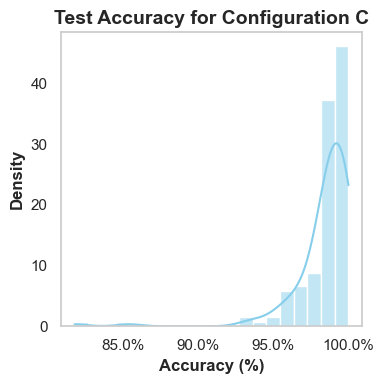

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV data
csv_file = 'accuracy.csv'  # Provide your CSV file path here
df = pd.read_csv(csv_file)

# Filter the DataFrame for config 'C'
config = 'C'
sub_df = df[df['config'] == config]

accuracy_col = 'test_accuracy'  # Adjust this if the actual name of the column is different

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the distribution using seaborn (either a histogram or a KDE plot)
plt.figure(figsize=(4, 4))
sns.histplot(sub_df[accuracy_col], kde=True, bins=20, color='skyblue', line_kws={'color': 'red'}, stat='density')

# Set labels and title
plt.xlabel(f'Accuracy (%)',fontsize=12, fontweight='bold')
plt.ylabel('Density',fontsize=12, fontweight='bold')
plt.title(f'Test Accuracy for Configuration {config}',fontsize=14, fontweight='bold')
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1.0))

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


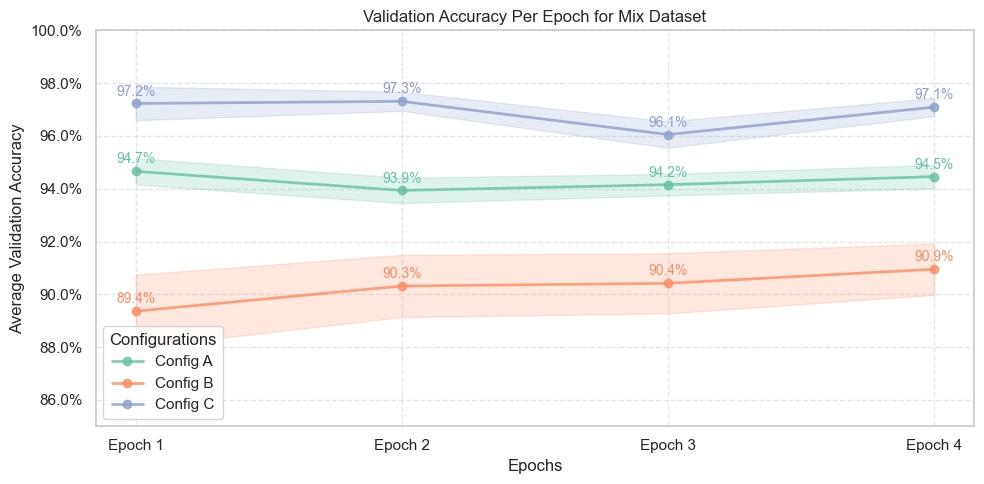

In [253]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter
import seaborn as sns

def plot_average_validation_accuracy(csv_file, dataset, dataset_col, config_col, epoch_columns, accuracy_col):
    """
    Compute the average validation accuracy per epoch for each dataset and configuration (A, B, C),
    and plot a line graph with labeled epochs and upper and lower accuracy bands.

    Parameters:
    - csv_file: Path to the CSV file.
    - dataset_col: The name of the column representing the dataset.
    - config_col: The name of the column representing the configuration (A, B, C).
    - epoch_columns: List of column names representing the validation accuracy for each epoch.
    - accuracy_col: The name of the column representing the validation accuracy.
    """
    # Load the CSV data into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Reshape the DataFrame to have epochs as a single column
    epoch_df = pd.melt(df, id_vars=[dataset_col, config_col], value_vars=epoch_columns, 
                       var_name='Epoch', value_name=accuracy_col)
    
    # Map the epoch columns to Epoch 1, Epoch 2, etc.
    epoch_df['Epoch'] = epoch_df['Epoch'].str.extract('(\d+)').astype(int)
    
    # Group by dataset, config, and epoch to calculate the average accuracy per epoch
    avg_accuracy_df = epoch_df.groupby([dataset_col, config_col, 'Epoch'])[accuracy_col].mean().reset_index()
    
    # Calculate the standard deviation around the mean
    std_accuracy_df = epoch_df.groupby([dataset_col, config_col, 'Epoch'])[accuracy_col].std().reset_index()

    # Plotting the data
    plt.figure(figsize=(10, 5))
    
    # Set the color palette
    palette = sns.color_palette("Set2", n_colors=len(avg_accuracy_df[config_col].unique()))

    # Filter the data for the current dataset
    dataset_data = avg_accuracy_df[avg_accuracy_df[dataset_col] == dataset]
    
    # Plot lines for each configuration (A, B, C)
    for idx, config in enumerate(dataset_data[config_col].unique()):
        config_data = dataset_data[dataset_data[config_col] == config]
        
        # Plot the line with transparency and a marker on each data point
        plt.plot(config_data['Epoch'], config_data[accuracy_col], label=f'Config {config}', 
                 color=palette[idx], linewidth=2, alpha=0.8, marker='o', markersize=6)
        
         # Get the standard deviation for the configuration
        std_data = std_accuracy_df[std_accuracy_df[config_col] == config]
        std_data = std_data[std_data[dataset_col] == dataset]
        # print(std_data)
        # Plot the shaded region around the mean (Mean ± Standard Deviation)
        plt.fill_between(config_data['Epoch'], 
                         config_data[accuracy_col] - 0.1 * std_data[accuracy_col], 
                         config_data[accuracy_col] + 0.1 * std_data[accuracy_col], 
                         color=palette[idx], alpha=0.2)

        # Annotate each data point with the accuracy value
        for i, row in config_data.iterrows():
            plt.text(row['Epoch'], row[accuracy_col] + 0.003, f"{row[accuracy_col] * 100:.1f}%", 
                     ha='center', color=palette[idx], fontsize=10)
    
    # Set labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Average Validation Accuracy')
    plt.title(f'Validation Accuracy Per Epoch for {dataset.capitalize()} Dataset')
    
    # Set custom x-ticks for epochs (1, 2, 3, 4)
    plt.xticks([1, 2, 3, 4], ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4'])
    plt.ylim(0.85, 1.0)
    
    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Format the y-axis as a percentage
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
    
    # Add a legend
    plt.legend(title="Configurations", loc='best')

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example usage
csv_file = 'accuracy.csv'  # Provide your CSV file path here
dataset_col = 'dataset'      # Name of the column for dataset
config_col = 'config'        # Name of the column for configuration (A, B, C)
epoch_columns = ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4']  # Columns for the epochs
accuracy_col = 'accuracy'    # Name of the column for validation accuracy

plot_average_validation_accuracy(csv_file, 'mix', dataset_col, config_col, epoch_columns, accuracy_col)


<!-- This function also returns lists of (input, target) pairs for which the model got at least one verb correct (`correct` is the set of sentences that are perfect, and `incorrect` is the sentences in which there is at least one mistake). You can explore these examples using the `test_tense_example` function. -->


<!-- incorrect -->

<!-- correct -->